In [1]:
# Neural Net from Scratch; uses a relu function
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from statistics import mean

def relu(x):
    if x<0:
        return 0
    else:
        return x

#deravitive of relu function
def relu_der(x):
    if x<=0:
        return 0
    else:
        return 1

class Neural_Net:
    def __init__(self):
        self.nodes = [] #list of list of lists where the first index is the layer and second is node in that layer
        self.graph = nx.Graph()
        self.training_inputs = [] #matrix of training inputs
        self.training_outputs = [] # matrix of training outputs
        self.connections = []
        self.num_links = 0
        
    def __repr__(self):
        return str(self.value)
    
    def add_neuron(self, layer, new_neuron): #adds a new neuron at layer (index starting from 0)
        self.nodes.append(new_neuron)
        self.graph.add_node(new_neuron)
    
    def add_connectivity(self, left_neuron, right_neuron, weight=1): #connectivity between left and right neurons
        new_connection = connection(left_neuron, right_neuron, weight)
        left_neuron.right_connections.append(new_connection)
        right_neuron.left_connections.append(new_connection)
        self.connections.append(new_connection)
        #add graph for displaying network
        self.graph.add_edge(left_neuron, right_neuron, weight)
    
    #gets the neuron at self, layer, and index
    def get_neuron(self, layer, index): 
        return self.nodes[layer][index]
    
    #return an array of neurons in a given layer, where layer is a python index
    def get_layer(self, layer):
        return self.nodes[layer]

    def plot_net(self):
        nx.draw(self.graph, with_labels=True)
        plt.show()

    
    #update the gradient for a single training example. 
    def calculate_gradient(self, training_input, training_output): #cost function to update gradients. Gradient
        #apply training input
        self.calculate(training_input)
        
        #iterate backwards through layers and update gradients
        for layer in reversed(self.nodes):
            for node in layer:
                node.calculate_gradient_term()
                for node_connection in node.left_connections:
                    node_connection.calculate_gradient_term()
        return
                
    def calculate(self, input_vector): #applies weights and biases throughout the neural net for a given input
        for node_index, node in self.nodes:  #update input nodes
            node.compute(input_vector[node_index])
        for layer in self.nodes[1:]: #update the rest of the nodes
            for node in layer:
                node.compute()
    
    #applies the gardient descent from calculated gradients
    def subtract_gradient(self, alpha):
        #iterate through nodes and update the nodes
        for layer in self.nodes:
            for node in layer:
                node.gradient_term = mean(node.gradient_set)
                node.bias -= alpha*node.gradient_term
                node.gradient_set = []
                
        for connection in self.connections:
            connection.gradient_term = mean(connection.gradient_set)
            connection.weight -= alpha*connection.gradient_term
            connection.gradient_set = []
                
        return

    #trains a neural net for given inputs and outputs
    #each training set is assumed to be a row of numpy array n iterations to meet 
    def train(self, training_inputs, training_outputs, iterations):
        for i in xrange(iterations):
            
            for index, training_input in training_inputs:
                training_output = training_outputs[index]
                self.calculate_gradient(training_input, training_output)

            self.subtract_gradient(.01)
    #def predict(self, training_data):
        
class Neuron: 
    def __init__(self):
        self.bias = 0
        self.activation= 1
        self.left_connections = [] #all connections to neurons to the left
        self.right_connections = [] #all connections to neurons to the right
        self.z = 1 #last value before applying the activation function; used for derivatives
        self.gradient_term = 0 #list of terms for each gradient term, corresponding to a training example
        self.gradient_set = [] #set of gradients already calculated in the training set
        
    def __repr__(self):
        return str(self.activation)
    
    #compute output of neuron using bias and weight
    def compute(self):
        left_sum = 0 #increment sum
        #sum up all contributions from left nodes
        for left_connection in self.left_connections:
            left_node = left_connection.left_neuron
            weight = left_connection.weight
            left_sum += left_node.activation*weight + left_node.bias 
        
        #z is the input before, used for calcualating the deravitive of activation function
        self.z = left_sum
        #apply activation function
        self.activation = relu(left_sum)
    
    #calculate gradient term for the bias associated with the node
    def calculate_gradient_term(self):
        grad_term = 0
        if self is Output_Neuron:
            self.gradient_term = 2*( self.activation - self.training_value)
        else:
            for right_connection in self.right_connections:
                grad_term += right_connection.gradient_term/self.activation #get rid of the self.activation because you diffirientate it away
            sigma_prime = relu_der(self.z)
            self.gradient_term = grad_term* sigma_prime
            
        self.gradient_set.append(self.gradient_term)
        
class OutputNeuron(Neuron):
    def __init__(self):
        super().__init__()
        self.training_value = 0

class InputNeuron(Neuron):
    def __init__(self):
        super().__init()
        self.activation = 1
    
    def compute(self, training_input):
        self.z = training_input
        self.activation = relu(training_input)

class connection: 
    def __init__(self, left_neuron, right_neuron, weight):
        self.left_neuron = left_neuron
        self.right_neuron = right_neuron
        self.weight = weight
        self.gradient_term = 0 #term currently being updated
        self.gradient_set = [] #set of gradients already calculated in the training set
    
    def calculate_gradient_term(self):
        right_node = self.right_neuron
        left_node = self.left_neuron
        if right_node is OutputNeuron:#means we are at the root node
            sigma_prime = relu_prime(right_node.z)
            grad_term = left_node.activation*sigma_prime*2(right_node.activation-right_node.training_value)
            self.gradient_term = grad_term
        else: 
            grad_term = 0
            sigma_prime = relu_prime(right_node.z)
            for right_nodes in right_node.right_connections:
                grad_term += right_node.gradient_term*right_node.weight/right_node.activation
            self.gradient_term = grad_term*left_node.activation*sigma_prime 
        
        self.gradient_set.append(self.gradient_term)
    

IndentationError: expected an indented block (<ipython-input-1-091d17bcaf7f>, line 55)

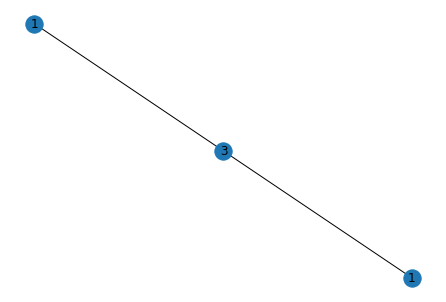

In [38]:
main_net = Neural_Net()
u = Neuron()

v = Neuron()
w= Neuron()
main_net.add_neuron(1, u)
main_net.add_neuron(2, v)
main_net.add_connectivity(u,v)
main_net.add_neuron(3,w)
main_net.add_connectivity(v, w)
v.bias=2
v.compute()
main_net.plot_net()


In [21]:
import numpy as np

a = np.arange(10).reshape(5,2)
for row, index in enumerate(a):
    print (row, index)
print(a)

0 [0 1]
1 [2 3]
2 [4 5]
3 [6 7]
4 [8 9]
[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
